<a href="https://colab.research.google.com/github/tricktx/Pre-Processamento/blob/main/4%C2%B0_Projeto_An%C3%A1lise_do_mercado_de_jogos_Pr%C3%A9_Processamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando as devidas bibliotecas.



In [ ]:
#Importando bibliotecas

import pandas as pd #Fornece estruturas de dados de alto nível e uma grande variedade de ferramentas para análise.
import numpy as np #Processamento de grandes matrizes e matrizes multidimensionais

##Visualização Gráfica
import matplotlib.pyplot as plt #Criação de diagramas e gráficos bidimensionais
import seaborn as sns #Há uma rica galeria de visualizações, incluindo alguns tipos complexos, como séries temporais e etc.
import plotly.express as px #Permite construir facilmente gráficos sofisticados, como gráficos 3D, gráficos ternários e etc.
import plotly.graph_objects as go

## Usando o pandas para trazer a base de dados em csv e analisando a base.

In [ ]:
df = pd.read_csv('/content/PS4_GamesSales.csv', header=0, encoding='unicode_escape')
df

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1029,Fallen Legion: Flames of Rebellion,NaN,Role-Playing,NaN,0.00,0.00,0.00,0.00,0.00
1030,Radial G Racing Revolved,2017.0,Racing,Tammeka Games,0.00,0.00,0.00,0.00,0.00
1031,The Mummy Demastered,NaN,Action,NaN,0.00,0.00,0.00,0.00,0.00
1032,Project Nimbus: Code Mirai,NaN,Action,NaN,0.00,0.00,0.00,0.00,0.00


In [ ]:
df.tail()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
1029,Fallen Legion: Flames of Rebellion,NaN,Role-Playing,NaN,0.0,0.0,0.0,0.0,0.0
1030,Radial G Racing Revolved,2017.0,Racing,Tammeka Games,0.0,0.0,0.0,0.0,0.0
1031,The Mummy Demastered,NaN,Action,NaN,0.0,0.0,0.0,0.0,0.0
1032,Project Nimbus: Code Mirai,NaN,Action,NaN,0.0,0.0,0.0,0.0,0.0
1033,Battle Chef Brigade,NaN,Action,NaN,0.0,0.0,0.0,0.0,0.0


# Pré Processamento

In [ ]:
# Renomeando as colunas

df.rename(columns={
    'Game' : 'Jogos',
    'Year' : 'Ano de lançamento',
    'Genre' : 'Gênero',
    'Publisher' : 'Empresa',
    'North America' : 'EUA',
    'Europe' : 'Europa',
    'Japan' : 'Japão',
    'Rest of World' : 'Restante do mundo'
}, inplace=True)
df.head()

,Jogos,Ano de lançamento,Gênero,Empresa,EUA,Europa,Japão,Restante do mundo,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [ ]:
# Informações sobre o meu DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Jogos              1034 non-null   object 
 1   Ano de lançamento  825 non-null    float64
 2   Gênero             1034 non-null   object 
 3   Empresa            825 non-null    object 
 4   EUA                1034 non-null   float64
 5   Europa             1034 non-null   float64
 6   Japão              1034 non-null   float64
 7   Restante do mundo  1034 non-null   float64
 8   Global             1034 non-null   float64
dtypes: float64(6), object(3)
memory usage: 72.8+ KB


In [ ]:
# Descrição do DataFrame, Count, Mean, Quartis, máximo, mínimo e etc.
df.describe()

,Ano de lançamento,EUA,Europa,Japão,Restante do mundo,Global
count,825.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000
mean,2015.966061,0.204613,0.248714,0.033636,0.089014,0.576054
std,1.298360,0.563471,0.785491,0.108344,0.249410,1.583534
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.000000,0.020000,0.000000,0.000000,0.010000,0.060000
75%,2017.000000,0.120000,0.130000,0.030000,0.050000,0.357500
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


In [ ]:
# Analise a quantidade de linhas por colunas do DataFrame 
df.shape

(1034, 9)

# Tratamento de valores inconsistentes

In [ ]:
df.index

RangeIndex(start=0, stop=1034, step=1)

Verificando valores inconsistente

In [ ]:
df[df['Ano de lançamento'] < 0 ].index

Int64Index([], dtype='int64')

In [ ]:
df[df['EUA'] < 0 ].index

Int64Index([], dtype='int64')

In [ ]:
df[df['Europa'] < 0 ].index

Int64Index([], dtype='int64')

In [ ]:
df[df['Japão'] < 0 ].index

Int64Index([], dtype='int64')

In [ ]:
df[df['Global'] < 0 ].index

Int64Index([], dtype='int64')

Caso, eu quisesse apagar somente os registros com valores inconsistentes

In [ ]:
# Caso, eu quisesse apagar somente os registros com valores inconsistentes
df3 = df.drop(df[df['Ano de lançamento'] < 0].index)
df3

,Jogos,Ano de lançamento,Gênero,Empresa,EUA,Europa,Japão,Restante do mundo,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1029,Fallen Legion: Flames of Rebellion,NaN,Role-Playing,NaN,0.00,0.00,0.00,0.00,0.00
1030,Radial G Racing Revolved,2017.0,Racing,Tammeka Games,0.00,0.00,0.00,0.00,0.00
1031,The Mummy Demastered,NaN,Action,NaN,0.00,0.00,0.00,0.00,0.00
1032,Project Nimbus: Code Mirai,NaN,Action,NaN,0.00,0.00,0.00,0.00,0.00


In [ ]:
# Caso tenhamos um volume muito grande de linhas faltantes na coluna 'Empresa', é melhor apagarmos a coluna.

df2 = df.drop('Empresa', axis=1)
df2

,Jogos,Ano de lançamento,Gênero,EUA,Europa,Japão,Restante do mundo,Global
0,Grand Theft Auto V,2014.0,Action,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...
1029,Fallen Legion: Flames of Rebellion,NaN,Role-Playing,0.00,0.00,0.00,0.00,0.00
1030,Radial G Racing Revolved,2017.0,Racing,0.00,0.00,0.00,0.00,0.00
1031,The Mummy Demastered,NaN,Action,0.00,0.00,0.00,0.00,0.00
1032,Project Nimbus: Code Mirai,NaN,Action,0.00,0.00,0.00,0.00,0.00


# Tratamento de valores faltantes


Excluindo as linhas faltantes

In [ ]:
# Soma dos valores faltantes
df.isnull().sum()

Jogos                  0
Ano de lançamento    209
Gênero                 0
Empresa              209
EUA                    0
Europa                 0
Japão                  0
Restante do mundo      0
Global                 0
dtype: int64

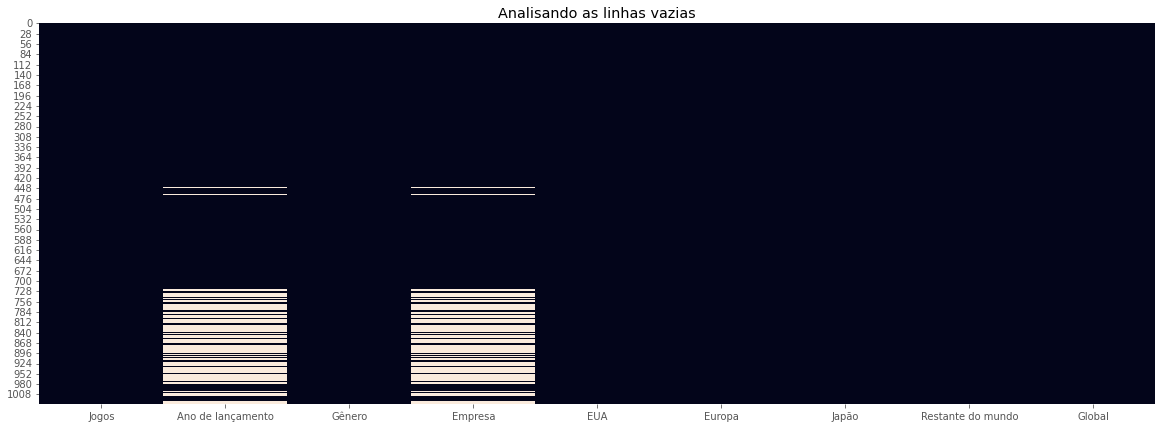

In [ ]:
# Analise gráfica da onde fica localizado os valores faltantes

plt.figure(figsize=(20,7))
plt.title('Analisando as linhas vazias')
sns.heatmap(df.isnull(), cbar=False);

Tratamento os dados faltantes do "Ano de lançamentos" usando a média.

In [ ]:
df['Ano de lançamento'].fillna(df['Ano de lançamento'].mean(), inplace = True)

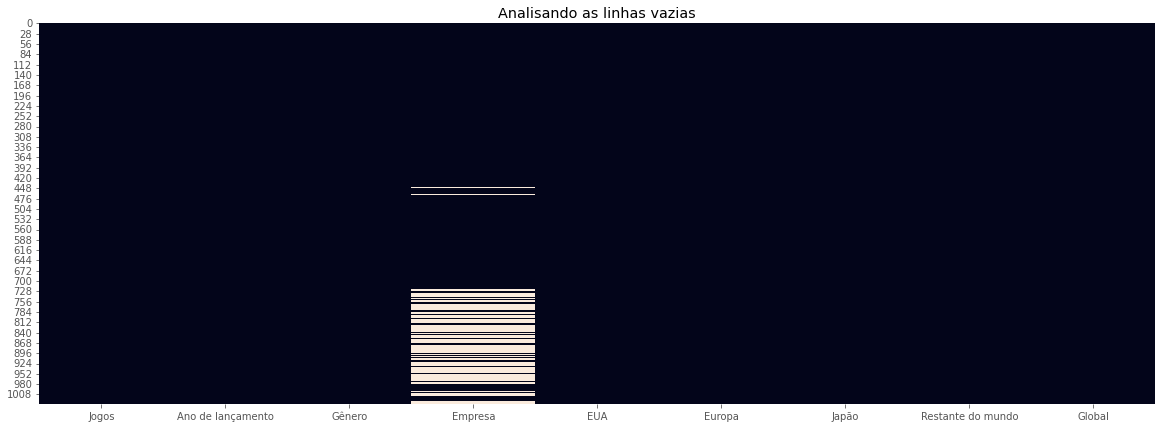

In [ ]:
# Analise gráfica da onde fica localizado os valores faltantes

plt.figure(figsize=(20,7))
plt.title('Analisando as linhas vazias')
sns.heatmap(df.isnull(), cbar=False);

Tratamento os dados faltantes da "Empresa" usando a mediana.

In [ ]:
# Identificando os valores mais frequentes

print(df.Empresa.value_counts())
Empresa_freq = df.Empresa.value_counts()[0]

Namco Bandai Games                56
Sony Interactive Entertainment    47
Ubisoft                           45
Square Enix                       40
Tecmo Koei                        37
                                  ..
Take-Two Interactive               1
CokeM Interactive                  1
Frontier Developments              1
Mojang                             1
Tammeka Games                      1
Name: Empresa, Length: 152, dtype: int64


In [ ]:
# Preencher missing values com o valor acima
df3.Empresa.fillna(Empresa_freq, inplace=True)

In [ ]:
df3.isnull().sum()

Jogos                  0
Ano de lançamento    209
Gênero                 0
Empresa                0
EUA                    0
Europa                 0
Japão                  0
Restante do mundo      0
Global                 0
dtype: int64

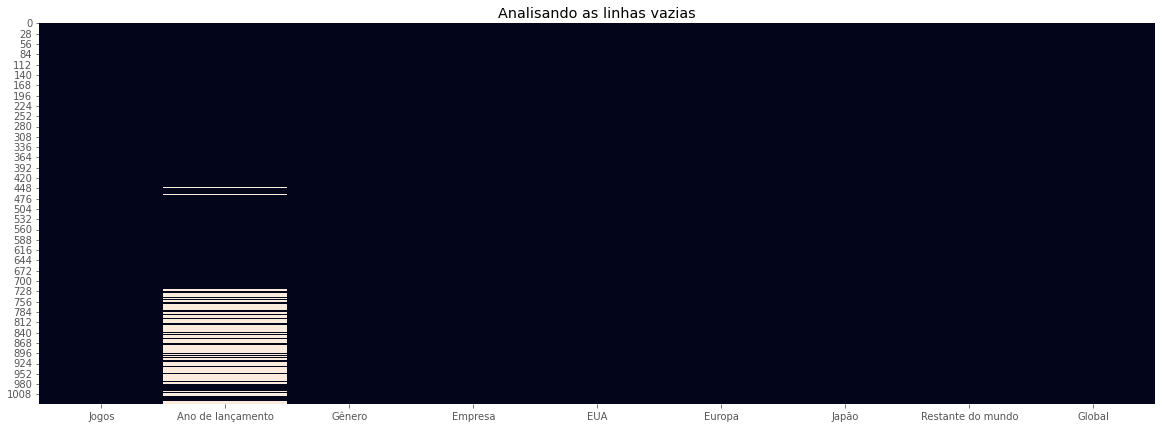

In [ ]:
#Analisando o gráfico do df3, qual, substitui as linhas vazias pela média.

plt.figure(figsize=(20,7))
plt.title('Analisando as linhas vazias')
sns.heatmap(df3.isnull(), cbar=False)

In [ ]:
#Verificando valores unicos
df.nunique()

Jogos                1031
Ano de lançamento       9
Gênero                 17
Empresa               152
EUA                   129
Europa                139
Japão                  45
Restante do mundo      85
Global                206
dtype: int64

In [ ]:
df['Gênero'].unique()

array(['Action', 'Shooter', 'Action-Adventure', 'Sports', 'Role-Playing',
       'Misc', 'Platform', 'Racing', 'Fighting', 'Adventure', 'MMO',
       'Simulation', 'Music', 'Party', 'Strategy', 'Puzzle',
       'Visual Novel'], dtype=object)

In [ ]:
df['Gênero'].nunique()

17

In [ ]:
df.pizza2 = round(df['Gênero'].value_counts(normalize=True)*100,2);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [ ]:
df['Empresa'].value_counts().head()

Namco Bandai Games                56
Sony Interactive Entertainment    47
Ubisoft                           45
Square Enix                       40
Tecmo Koei                        37
Name: Empresa, dtype: int64

In [ ]:
df['Empresa'].value_counts(normalize=True)

Namco Bandai Games                0.067879
Sony Interactive Entertainment    0.056970
Ubisoft                           0.054545
Square Enix                       0.048485
Tecmo Koei                        0.044848
                                    ...   
Take-Two Interactive              0.001212
CokeM Interactive                 0.001212
Frontier Developments             0.001212
Mojang                            0.001212
Tammeka Games                     0.001212
Name: Empresa, Length: 152, dtype: float64

In [ ]:
df['Gênero'].value_counts(normalize=True)

Action              0.249516
Role-Playing        0.118956
Misc                0.118956
Adventure           0.093810
Shooter             0.086074
Sports              0.068665
Racing              0.046422
Platform            0.044487
Action-Adventure    0.038685
Fighting            0.033849
Strategy            0.027079
Simulation          0.022244
Music               0.018375
Puzzle              0.015474
MMO                 0.007737
Visual Novel        0.007737
Party               0.001934
Name: Gênero, dtype: float64

## Gráfico de pizza

In [ ]:
df.pizza = round(df['Empresa'].value_counts(normalize=True)*100,2);
df.pizza.head(7)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


Namco Bandai Games                6.79
Sony Interactive Entertainment    5.70
Ubisoft                           5.45
Square Enix                       4.85
Tecmo Koei                        4.48
Activision                        3.64
Capcom                            3.64
Name: Empresa, dtype: float64

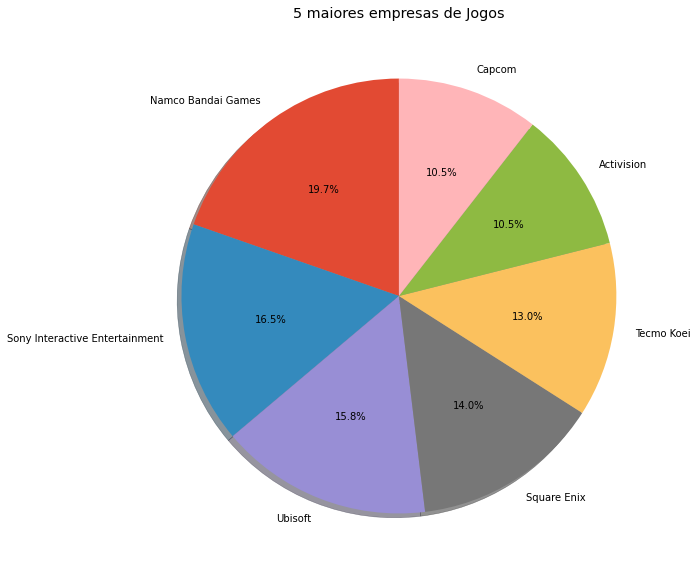

In [ ]:
plt.figure(figsize=(30,10))
plt.title('5 maiores empresas de Jogos')

plt.pie(df.pizza.head(7),
        labels = df.pizza.index[0:7],
        shadow = True,
        startangle=90, # Direção do gráfico 
        autopct='%1.1f%%'
);

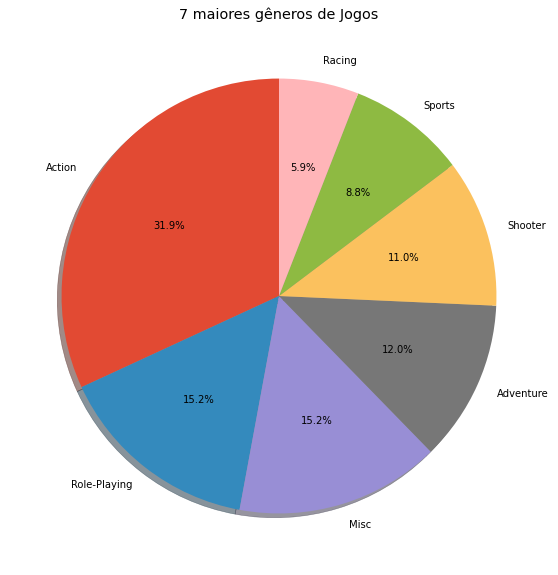

In [ ]:
#Tamanho do gráfico
plt.figure(figsize=(30,10))
#Título
plt.title('7 maiores gêneros de Jogos')
#Plotagem do gráfico
plt.pie(df.pizza2.head(7),
        labels = df.pizza2.index[0:7],
        shadow = True,
        startangle=90, # Direção do gráfico 
        autopct='%1.1f%%'
);

In [ ]:
#Agrupamento para ver a contagem de dados pela coluna "Ano de lançamento"
df.groupby(by=['Ano de lançamento']).sum()

,EUA,Europa,Japão,Restante do mundo,Global
Ano de lançamento,,,,,
2013.000000,10.35,12.88,0.97,4.57,28.76
2014.000000,39.80,54.12,3.58,18.29,115.85
2015.000000,49.60,56.21,7.28,20.88,133.99
2015.966061,0.00,0.10,0.09,0.01,0.22
2016.000000,47.40,57.98,9.65,20.71,135.72
2017.000000,44.77,57.18,9.08,19.89,130.90
2018.000000,19.65,18.70,4.13,7.69,50.20
2019.000000,0.00,0.00,0.00,0.00,0.00
2020.000000,0.00,0.00,0.00,0.00,0.00


In [ ]:
#barWidth = 0.25
#plt.figure(figsize=(20,7))
#plt.title('Analise de vendas no Continente Europeu')

#r1 = np.arange(le('EUA'))
#r2 = [x + barWidth for x in r1]
#r3 = [x + barWidth for x in r2]

#plt.bar(r1, 'EUA', color ='r', width = barWidth,
#        edgecolor ='grey', label ='EUA')
#plt.bar(r2, 'Europa', color ='g', width = barWidth,
#        edgecolor ='grey', label ='Europa')
#plt.bar(r3, 'Japão', color ='b', width = barWidth,
#        edgecolor ='grey', label ='Japão')

#plt.xlabel('Ano', fontweight ='bold', fontsize = 15)
#plt.ylabel('Students passed', fontweight ='bold', fontsize = 15)
#plt.xticks([r + barWidth for r in range(len('EUA'))],
#        ['2015', '2016', '2017', '2018', '2019'])
#
#plt.legend()
#plt.show()

# Gráfico de barras

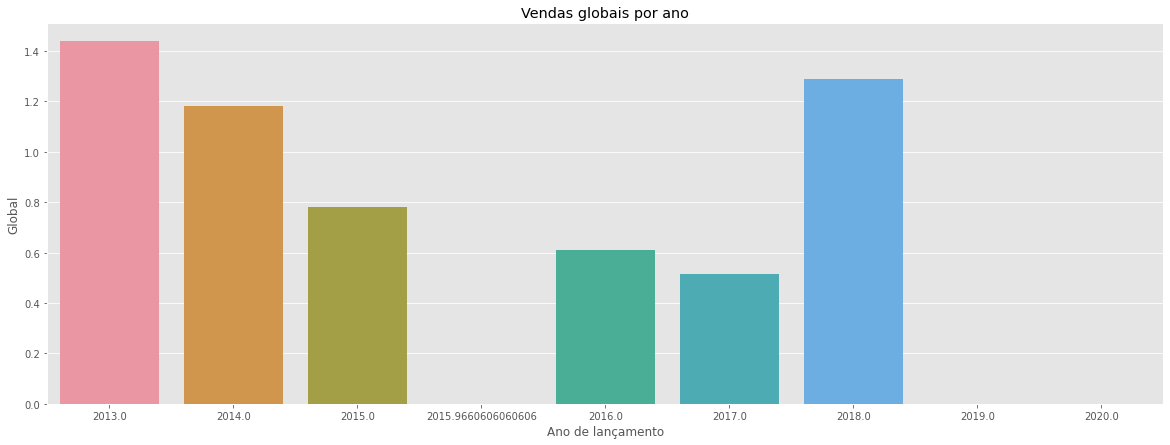

In [ ]:
#Tamanho do gráfico
plt.figure(figsize=(20,7))
# Estilo do Gráfico
plt.style.use('ggplot')
#Título do gráfico
plt.title('Vendas globais por ano')
#Plotagem do gráfico
sns.barplot(data=df,
            x='Ano de lançamento',
            y='Global',
            ci=None);

# Gráfico de distribuição

In [ ]:

df = df.loc[(df['Ano de lançamento'] != 2019 ) & (df['Ano de lançamento'] != 2020)]

df.head()

,Jogos,Ano de lançamento,Gênero,Empresa,EUA,Europa,Japão,Restante do mundo,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


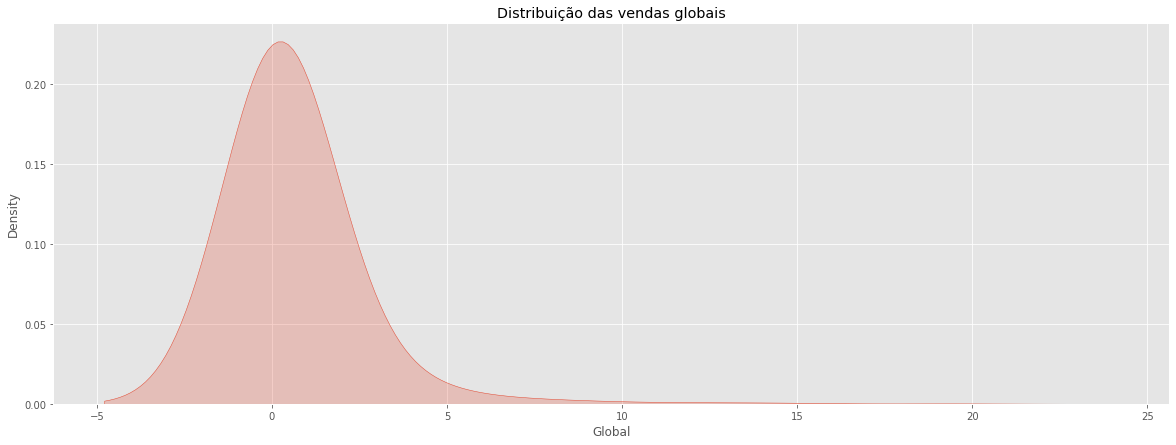

In [ ]:
#Tamanho do gráfico
plt.figure(figsize=(20,7))
# Estilo do Gráfico
plt.style.use('ggplot')
#Título do gráfico
plt.title('Distribuição das vendas globais')
#Plotagem do gráfico
sns.kdeplot(df['Global'],
            shade=True, #Sombra
            bw=1
            );

# Gráfico de boxplot

Text(0, 0.5, 'Distribuição global')

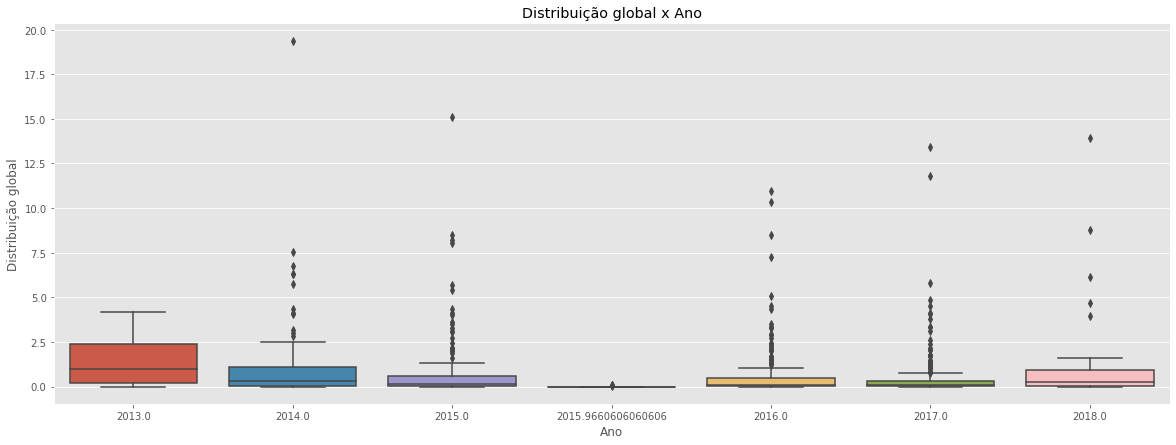

In [ ]:
plt.figure(figsize=(20,7))
plt.title('Distribuição global x Ano')
sns.boxplot(data=df,
            x='Ano de lançamento',
            y='Global')

plt.xlabel('Ano')
plt.ylabel('Distribuição global')


# LabelEncoder

Como no cenário acima, os nomes não tem uma ordem ou uma classificação, o LabelEncoder funciona bem nesse caso, transformando-os em valores números.

In [ ]:
df.columns

Index(['Jogos', 'Ano de lançamento', 'Gênero', 'Empresa', 'EUA', 'Europa',
       'Japão', 'Restante do mundo', 'Global'],
      dtype='object')

In [ ]:
x_df = df.iloc[:, 0:8].values
x_df

array([['Grand Theft Auto V', 2014.0, 'Action', ..., 9.71, 0.6, 3.02],
       ['Call of Duty: Black Ops 3', 2015.0, 'Shooter', ..., 6.05, 0.41,
        2.44],
       ['Red Dead Redemption 2', 2018.0, 'Action-Adventure', ..., 6.21,
        0.21, 2.26],
       ...,
       ['The Mummy Demastered', 2015.9660606060606, 'Action', ..., 0.0,
        0.0, 0.0],
       ['Project Nimbus: Code Mirai', 2015.9660606060606, 'Action', ...,
        0.0, 0.0, 0.0],
       ['Battle Chef Brigade', 2015.9660606060606, 'Action', ..., 0.0,
        0.0, 0.0]], dtype=object)

In [ ]:
y_df = df.iloc[:, 8].values
y_df

array([19.39, 15.09, 13.94, ...,  0.  ,  0.  ,  0.  ])

In [ ]:
# Importando o LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Fazendo o teste inicial
label_encoder_teste = LabelEncoder()

In [ ]:
x_df[:,3]

array(['Rockstar Games', 'Activision', 'Rockstar Games', ..., nan, nan,
       nan], dtype=object)

teste

In [ ]:
# substituição de Grand Theft Auto V = 334, Call of Duty: Black Ops 3 = 124, Red Dead Redemption 2 = 657, etc.
teste = label_encoder_teste.fit_transform(x_df[:,0])
teste

array([334, 124, 657, ..., 850, 619,  81])

In [ ]:
# Label_Encoder = Objeto sabe como entender as palavras

label_encoder_Jogos = LabelEncoder ()
label_encoder_Gênero = LabelEncoder ()
label_encoder_Empresa = LabelEncoder()

In [ ]:
# Codificar o Label Encoder nas seguintes colunas
x_df[:,0] = label_encoder_Jogos.fit_transform(x_df[:,0])
x_df[:,2] = label_encoder_Gênero.fit_transform(x_df[:,2])
x_df[:,3] = label_encoder_Empresa.fit_transform(x_df[:,3])
x_df

array([[334, 2014.0, 0, ..., 9.71, 0.6, 3.02],
       [124, 2015.0, 12, ..., 6.05, 0.41, 2.44],
       [657, 2018.0, 1, ..., 6.21, 0.21, 2.26],
       ...,
       [850, 2015.9660606060606, 0, ..., 0.0, 0.0, 0.0],
       [619, 2015.9660606060606, 0, ..., 0.0, 0.0, 0.0],
       [81, 2015.9660606060606, 0, ..., 0.0, 0.0, 0.0]], dtype=object)

In [ ]:
x_df

array([[334, 2014.0, 0, ..., 9.71, 0.6, 3.02],
       [124, 2015.0, 12, ..., 6.05, 0.41, 2.44],
       [657, 2018.0, 1, ..., 6.21, 0.21, 2.26],
       ...,
       [850, 2015.9660606060606, 0, ..., 0.0, 0.0, 0.0],
       [619, 2015.9660606060606, 0, ..., 0.0, 0.0, 0.0],
       [81, 2015.9660606060606, 0, ..., 0.0, 0.0, 0.0]], dtype=object)

# Escalonamento de valores

Fórmula = valor = (valor — média) / desvioPadão

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_df = StandardScaler()
x_df = scaler_df.fit_transform(x_df)

In [ ]:
x_df[0]

array([-0.58614881, -1.78740673, -1.17035763,  0.25460275, 10.30194664,
       11.93940042,  5.17803545, 11.65078179])